In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# tf.debugging.set_log_device_placement(True)

In [4]:
TRAINING_DIR = "training_data/training"

VALIDATION_DIR = "training_data/validation"

batch_size = 32
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
# train_image_generator = ImageDataGenerator(rescale=1./255)

# validation_image_generator = ImageDataGenerator(rescale=1./255)

train_image_generator = ImageDataGenerator(rescale=1./255)

validation_image_generator = ImageDataGenerator(rescale=1./25)

In [6]:
# train_image_generator_all_aug = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=45,
#                     width_shift_range=.15,
#                     height_shift_range=.15,
#                     horizontal_flip=True,
#                     zoom_range=0.5
#                     )

In [7]:
# train_image_generator_rot_aug = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=30,
#                     )

In [28]:
train_data_gen_batches = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=TRAINING_DIR,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           color_mode="grayscale",
                                                           class_mode='categorical',
                                                           )

# train_image_generator_all_aug = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                            directory=TRAINING_DIR,
#                                                            shuffle=True,
#                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='binary')

# train_image_generator_rot_aug = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                            directory=TRAINING_DIR,
#                                                            shuffle=True,
#                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='binary')

Found 5367 images belonging to 100 classes.


In [29]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=VALIDATION_DIR,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              color_mode="grayscale",
                                                              class_mode='categorical')

Found 1300 images belonging to 100 classes.


In [30]:
# model = Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#     MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1)
# ])

TypeError: Invalid shape (1, 150, 150) for image data

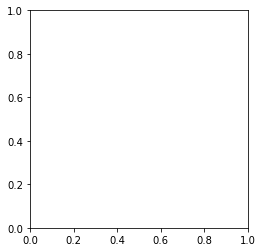

In [46]:
x_batch, y_batch = next(train_data_gen_batches)

for i in range (0, batch_size):
    image = x_batch[i]
    plt.imshow(image.transpose(2,1,0))
    plt.show()

In [39]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='softmax')
])



In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
tensor_board = tf.keras.callbacks.TensorBoard('.\logs\aircraft-classifier')

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               43655296  
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [43]:
history = model.fit(train_data_gen_batches, epochs=epochs, validation_data = val_data_gen, verbose = 1)
# history_all_aug = model.fit(train_image_generator_all_aug, epochs=epochs, validation_data = val_data_gen, verbose = 1)
# history_rot_aug = model.fit(train_image_generator_rot_aug, epochs=epochs, validation_data = val_data_gen, verbose = 1)

Epoch 1/5
42/42 [==============================] - 75s 2s/step - loss: 0.6981 - accuracy: 0.0089 - val_loss: 0.6981 - val_accuracy: 0.0138
Epoch 2/5
42/42 [==============================] - 76s 2s/step - loss: 0.6981 - accuracy: 0.0117 - val_loss: 0.6981 - val_accuracy: 0.0131
Epoch 3/5
42/42 [==============================] - 76s 2s/step - loss: 0.6981 - accuracy: 0.0125 - val_loss: 0.6981 - val_accuracy: 0.0200
Epoch 4/5
42/42 [==============================] - 75s 2s/step - loss: 0.6980 - accuracy: 0.0160 - val_loss: 0.6980 - val_accuracy: 0.0246
Epoch 5/5
42/42 [==============================] - 76s 2s/step - loss: 0.6980 - accuracy: 0.0209 - val_loss: 0.6980 - val_accuracy: 0.0215


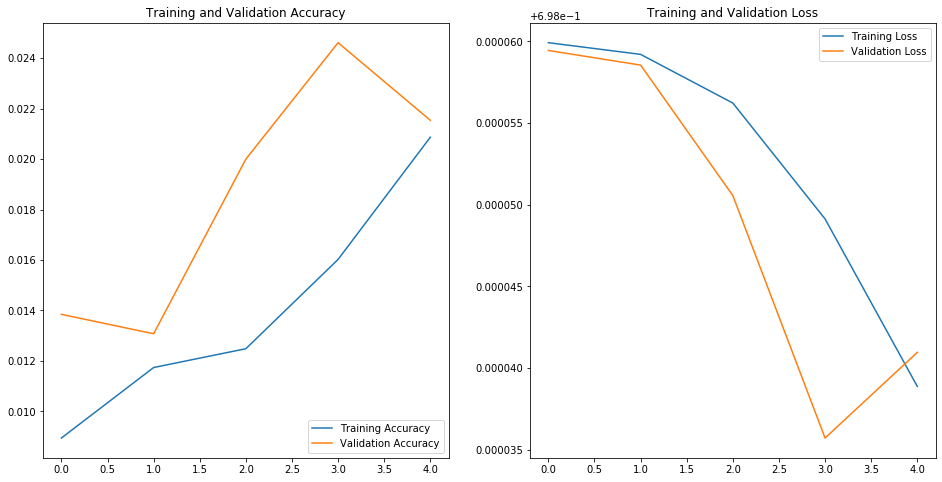

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()